# はじめに
機械学習をやりたい！というエネルギッシュな初心者(私)が必ずつまずく壁が固有値だと思うんです。

固有値は高校数学で意味わからない成りに計算させられるので、「あ、なんか行列に備わってる大事な値なんだなー」くらいの認識はあると思います。

しかし具体的にどう使うの？とか何が便利なの？とか数学で抱えがちな疑問を残したまま、記憶の彼方に置き去りにされてしまう人も多いのではないでしょうか(私)。

そして機械学習やるぞ！となったときに固有値を理解する必要に迫られ、あの時ちゃんとやってりゃ良かった...と後悔するのです(私)。

本記事の目的は、固有値がどういうものかを理解しつつ、二次形式と主成分分析という比較的簡単な応用例を実装することで、固有値がどう便利なのか、固有値は機械学習でどう使われているのかを知ろうというものです。
# 固有値ってなんだ！？！？！？！？
まず初めに固有値についてなのですが、イメージをつかむなら[この記事](https://qiita.com/kenmatsu4/items/2a8573e3c878fc2da306)が素晴らしくピッタリだと思います。

記事を貼り付けるだけなのも情けないのでこちらでも概要だけ説明すると

- 固有値は線形変換後の各座標の倍率
- 固有ベクトルは線形変換後も向きが変わらないベクトル

です。どういうことか直感的に理解するために次の線形変換を行ってみましょう。
$$
\begin{pmatrix}
x^{t=2} \\
y^{t=2} 
\end{pmatrix}=
\begin{pmatrix}
4 & -2 \\
1 & 1 
\end{pmatrix}
\begin{pmatrix}
x^{t=1} \\
y^{t=1} 
\end{pmatrix}
$$
今回は初期値($x^{t=1}$,$y^{t=1}$)=(2,3)とします。また、今後の文章の簡単化のため、右辺の2行2列の正方行列を行列Aとします。


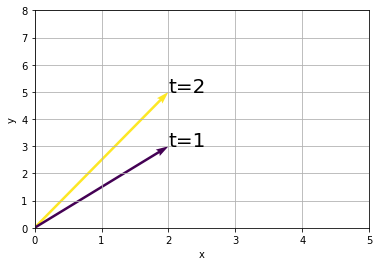

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
A =np.array([[4,-2],[1,1]])
x=np.array([2,3])
x=np.reshape(x,(2,1))
y = np.dot(A,x)
X = 0,0
Y = 0,0
U=[y[0],x[0]]
V=[y[1],x[1]]
colors = [2,1]
plt.quiver(X,Y,U,V,colors,angles='xy',scale_units='xy',scale=1)
plt.text(x[0], x[1], 't=1',fontsize=20)
plt.text(y[0], y[1], 't=2',fontsize=20)
plt.xlim([0,5])
plt.ylim([0,8])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.draw()
plt.show()

実行結果を見ると、ベクトル(2,3)が、行列Aによって変形され、ベクトル(2,5)となっていることがわかりますね。
このような「ベクトルを行列によって変換する作業」を線形変換といいます。では同じ行列Aを用いて別のベクトルを線形変換してみます。
$$
\begin{pmatrix}
x^{t=2} \\
y^{t=2} 
\end{pmatrix}=
\begin{pmatrix}
4 & -2 \\
1 & 1 
\end{pmatrix}
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
$$

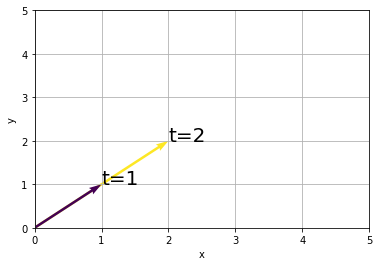

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
A =np.array([[4,-2],
             [1,1]])
x=np.array([1,1])
x=np.reshape(x,(2,1))
y = np.dot(A,x)
X = 0,0
Y = 0,0
U=[y[0],x[0]]
V=[y[1],x[1]]
colors = [2,1]
plt.quiver(X,Y,U,V,colors,angles='xy',scale_units='xy',scale=1)
plt.text(x[0], x[1], 't=1',fontsize=20)
plt.text(y[0], y[1], 't=2',fontsize=20)
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.draw()
plt.show()

実行結果がこちらです。先ほどとは違って線形変換後もベクトルは同じ方向を向いていますね。

このような、「線形変換後も向きが変わらずに、スカラー倍されるだけのベクトル」を固有ベクトルと呼びます。固有ベクトル以外のベクトルを線形変換すると向きも大きさも変わってしまいますが、固有ベクトルだけは大きさが変化するのみなんですね。ある意味「行列の本質を表しているベクトル」と言ってもいいかもしれません。

順序が入れ替わっている気がしなくもなくもないですが、今回用いた行列Aについて固有値、固有ベクトルを導出してみます。

まずは固有値を固有方程式から算出します。
$$
\begin{vmatrix}
A-\lambda I  
\end{vmatrix}=
\begin{vmatrix}
4-\lambda & -2 \\
1 & 1-\lambda 
\end{vmatrix}=(4-\lambda)(1-\lambda)+2=\lambda ^2-5\lambda+6=(\lambda-3)(\lambda-2)
$$
$$
\lambda _1=3,\lambda _2=2
$$

続いて各固有値に対応した固有ベクトル$p_1$,$p_2$を求めます。
まずは$\lambda_1=3$に対応した固有ベクトル$p_1$を求めます。
$$
\begin{pmatrix}
4 & -2 \\
1 & 1 
\end{pmatrix}
\begin{pmatrix}
x \\
y 
\end{pmatrix}=3\begin{pmatrix}
x \\
y 
\end{pmatrix}
$$
$$
4x-2y=
3x\\x=
2y\\p_1=
\begin{pmatrix}
2 \\
1 
\end{pmatrix}
$$

続いて$\lambda_2=2$に対応した固有ベクトル$p_2$を求めます。
$$
\begin{pmatrix}
4 & -2 \\
1 & 1 
\end{pmatrix}
\begin{pmatrix}
x \\
y 
\end{pmatrix}
=2\begin{pmatrix}
x \\
y 
\end{pmatrix}
$$

$$
4x-2y=
2x\\2x=
2y\\p_2=
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
$$

この計算から、固有値が2,3であること、固有値2に対応する固有ベクトルは(1,1),固有値3に対応する固有ベクトルは(2,1)であることがわかりました。
先ほど線形変換したベクトルは(1,1)で返還後は(2,2)でした。つまり、固有ベクトルを線形変換すると固有値倍されるのです。
それを改めて確かめるために今度は初期値を(2,1)として試してみましょう。

[[ 4 -2]
 [ 1  1]]
[[6]
 [3]]


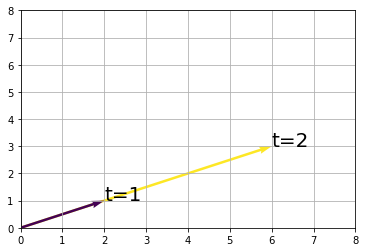

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
#plt1.figure
A =np.array([[4,-2],[1,1]])
print(A)
x=np.array([2,1])
x=np.reshape(x,(2,1))
y = np.dot(A,x)
print(y)
X = 0,0
Y = 0,0
U=[y[0],x[0]]
V=[y[1],x[1]]
colors = [2,1]
plt.quiver(X,Y,U,V,colors,angles='xy',scale_units='xy',scale=1)
plt.text(x[0], x[1], 't=1',fontsize=20)
plt.text(y[0], y[1], 't=2',fontsize=20)

plt.xlim([0,8])
plt.ylim([0,8])
plt.grid()
plt.draw()
plt.show()

実行結果から、固有ベクトル(2,1)が固有値倍（3倍）されて現れていることがわかりました。

# 二次形式への応用(ゼロから学ぶ線形代数6章の要約)
固有値、固有ベクトルの大事さを体感するために、二次形式という数学的な応用例を試してみましょう。

次のような多項式があるとします(a,b,cは定数)。
$$
ax^2 + 2bxy + cy^2 = 0 \tag{1}
$$
このような式を2変数の2次形式と呼びます。$x^2$も$xy$も$y^2$も全部次数は2ですから、2次形式なんですね。

二次形式は大きく二つに分類されます。「ずっと0以上またはずっと0以下を取るもの」と「正と負両方の値をとるもの」です。また、常に0以上の値を取るものを正値定符号、常に0以下の値を取るものを負定値符号といいます。

この正値定符号、負定値符号というのは、関数の極大値極小値を知るうえで非常に大事になってきます。

例として、以下のような二次形式が与えられたとします。
$$
3x^2 + 4xy + 3y^2 = 0
$$

この二次形式が正値定符号、負定値符号であるかは式変形をすることで分かります。

$$
\frac{1}{2}(x-y)^2 +\frac{5}{2}(x+y)^2 = 0 
$$

上式から、この関数が取りうる値は全て正の値であることがわかるので、この二次形式は正値定符号であることがわかりました。


しかしこのように式変形が毎回うまいこと行くとは限りません。ですが行列を使うことで、与えられた二次形式が正値定符号か、負定値符号であるか、そのどちらでもないかが容易に判別できます。

ここから先は数式で追っていきましょう。まず、(1)で示した二次形式の式を行列で以下のように書き換えます。

$$
ax^2+2bxy+cy^2 = 
\begin{pmatrix}
x \\
y 
\end{pmatrix}
\cdot
\begin{pmatrix}
a & b \\
b & c 
\end{pmatrix}
\begin{pmatrix}
x \\
y 
\end{pmatrix}
\tag{2}
$$

この式にある(x,y)を固有ベクトル$e_1$,$e_2$を用いて線形変換します。

$$
\begin{pmatrix}
x \\
y 
\end{pmatrix} = 
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime}
\end{pmatrix}
$$
これを(2)に代入すると次のようになります。

$$
ax^2+2bxy+cy^2 = 
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
\cdot
\begin{pmatrix}
a & b \\
b & c 
\end{pmatrix}
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
$$
行列Aの固有ベクトル$e_1$,$e_2$は行列Aによって線形変換されても固有値倍されるだけなので以下のように変形できます。

$$
\begin{pmatrix}
a & b \\
b & c 
\end{pmatrix}
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
=
\begin{pmatrix}
\lambda_1 e_1 &\lambda_2 e_2 
\end{pmatrix}
=
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2 
\end{pmatrix}
\tag{3}
$$

変形した式を(2)に代入します。

$$
ax^2+2bxy+cy^2 = 
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
\cdot
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
$$
さらに転置と内積の公式$AXY=XA^T Y$を用いて

$$
ax^2+2bxy+cy^2 = 
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
\begin{pmatrix}
e_1 \\
e_2 
\end{pmatrix}
\cdot
\begin{pmatrix}
e_1 &e_2 
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
$$
固有ベクトル$e_1$,$e_2$はそれぞれ直交ベクトルなので

$$
ax^2+2bxy+cy^2 = 
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
0 & 1 
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 \\
0 & \lambda_2 
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} 
\end{pmatrix}
=\lambda_1 x^{\prime 2} + \lambda_2 y^{\prime 2}
$$
と変形できます。これにより、二次形式をその表現行列の固有値で表現することができました。

この式は固有値が全て正だと正値定符号、全て負だと負定値符号、正と負が混ざったときはそのどちらでもないことを示しています。

つまり、二次形式の表現行列の固有値がわかれば、どのような極値を取るのかがわかるということです。

実際の例を見てみましょう

与えられた二次形式の式が、先ほどと同じ$3x^2-4xy+3y^2$だとします。この式を(2)の形に書き換えると、

$$
3x^2-4xy+3y^2 = 
\begin{pmatrix}
x \\
y 
\end{pmatrix}
\cdot
\begin{pmatrix}
3 & -2 \\
-2 & 3 
\end{pmatrix}
\begin{pmatrix}
x \\
y 
\end{pmatrix}
$$

となります。
表現行列Aの固有方程式から固有値を求めると

$$
\begin{vmatrix}
A-\lambda I 
\end{vmatrix}= 
\begin{vmatrix}
3-\lambda & -2 \\
-2 & 3-\lambda 
\end{vmatrix}
=(3-\lambda)^2-4
=\lambda ^2-6\lambda+5
=(\lambda-1)(\lambda-5)
$$
となり固有値は1,5となり両方正なので正値定符号であることがわかりました。

実際にそうなのかグラフにしてみてみましょう。

固有値1:5.000000
固有値2:1.000000
正値定符号


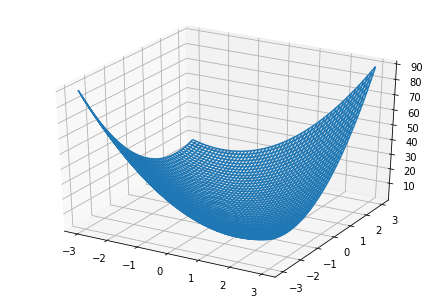

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
a=3
b=2
c=3
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)
A=[[a,b],
   [b,c]]
w,v=np.linalg.eig(A)
print('固有値1:%f' % w[0])
print('固有値2:%f' % w[1])
if(w[0]>0 and w[1]>0):
    print('正値定符号')
if(w[0]<0 and w[1]<0):
    print('負値定符号')
if((w[0]>0 and w[1]<0) or (w[0]<0 and w[1]>0)):
    print('どちらでもない')
Z =a*X**2+2*b*X*Y+c*Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

実行結果から、この関数は正の値しか取っていないことがわかりました。
したがって、極小値を持つこともわかりました。

# 固有値問題(主成分分析)
機械学習ではしばしば固有値問題という言葉が出てきます。
今回は固有値問題の簡単な例である主成分分析を実装してみます。
主成分分析は、次元削減の手法の一つで多次元データを可視化する際などに使われます。
主成分分析で鍵となるのは以下に示す共分散行列です。
$$
S = \frac{1}{N}\sum_{n=1}^N(x_n-\bar x)(x_n-\bar x)^T
$$

式中の$x_n$は各データ、$\bar x$は全データの平均を示しています。
この共分散行列の固有値を出し、固有値の大きい順にそのデータの主成分とし、元データを線形変換します。

例えばデータが4次元の場合だと固有値は4つ出てきます。2次元に可視化するためには固有値が最も大きい二つを主成分とし、その固有値に対応した固有ベクトルによってデータを並び替える(線形写像する)のです。

共分散行列の大きな固有値に対応した固有ベクトルを主成分とすることは、そのデータの分散の大きい軸を選びなおすことになります。

それがどういう意味を持つのか体感するために、具体的な実装例を以下に載せます。

Automatically created module for IPython interactive environment


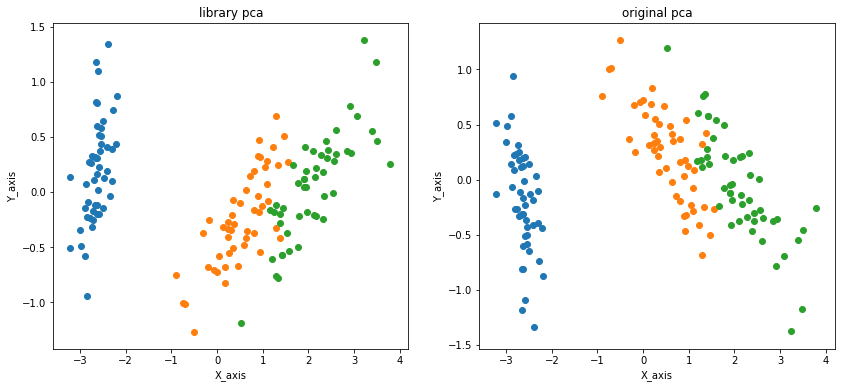

In [19]:
print(__doc__)

#PCA：主成分分析
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np#numpyをインストール
import matplotlib.pyplot as plt#グラフを書くやつ
from mpl_toolkits.mplot3d import Axes3D#3次元plotを行うためのツール
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition#PCAのライブラリ
from sklearn import datasets#datasetsを取ってくる

Xpc=[]
n_component=2
np.set_printoptions(suppress=True)
fig = plt.figure(2, figsize=(14, 6))
iris = datasets.load_iris()
X = iris.data
y = iris.target
for i in range(4):#各データの平均を元のデータから引いている
    mean = np.mean(X[:,i])
    X[:,i]=(X[:,i]-mean)
X_cov=np.dot(X.T,X)#共分散行列を生成
w,v=np.linalg.eig(X_cov)#共分散行列の固有値、固有ベクトルを算出(固有値は既に大きさ順に並べられている)
for i in range(n_component):#固有値の大きい順に固有ベクトルを取り出す
    Xpc.append(v[:,i])
Xpc=np.array(Xpc)
Xafter=np.dot(X,Xpc.T)#取り出した固有ベクトルでデータを線形写像する


pca = decomposition.PCA(n_components=2)
pca.fit(X)
Xlib = pca.transform(X)    


ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(Xlib[y == label, 0],
                Xlib[y == label, 1])
ax1.set_title('library pca')
ax1.set_xlabel("X_axis")
ax1.set_ylabel("Y_axis")
ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(Xafter[y == label, 0],
                Xafter[y == label, 1])
ax2.set_title('original pca')
ax2.set_xlabel("X_axis")
ax2.set_ylabel("Y_axis")
plt.show()

今回はScikitlearnに公開されているIrisデータセットという4次元のデータを2次元まで次元削減して可視化しています。

左図はscikit-learnで公開されている主成分分析用のライブラリを使った結果、右図は数式を実際に再現して主成分分析をした結果を示しています。

Irisデータセットはアヤメの品種のデータセットです。セトナ、バーシクル、 バージニカという3種類のアヤメのがく片長,がく片幅,花びら長,花びら幅から構成されています。

Irisデータセットをそのまま図示しようとしても各アヤメのデータは4つあるため、2次元や3次元には図示できません。

そこで次元削減を行うのですが、出来るだけ情報を残して次元を落としたいものです。

主成分分析をした結果を見てみると、セトナ、バーシクル、 バージニカの3種類のデータが綺麗に分けられているように見えます。

これが分散の大きい軸を選ぶ利点です。分散の大きい軸を選ぶことで、データの情報を残したまま次元削減しているのです。

そしてそれを可能にしているのが固有値、固有ベクトルという要素なのです。

# まとめ
本記事では二次形式、主成分分析という応用例を実装しました。
それにより、固有値、固有ベクトルが数学的にも、機械学習においても大事な要素であることがわかりました。
次回は固有値の親戚みたいなものである特異値について書きたいと思います。

参考文献:ゼロから学ぶ線形代数、機械学習のエッセンス、PRML(下巻)
